In [1]:
import pandas as pd
import csv
import matplotlib as mp
import seaborn as sns

/tmp/nix-shell.aP81RK/ipykernel_3535093/3033144630.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["emulator", "benchmark", "threads", "type"], as_index=False).apply(median_no_fails)
/tmp/nix-shell.aP81RK/ipykernel_3535093/3033144630.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["benchmark", "threads", "type"], as_index=False).apply(normalize)


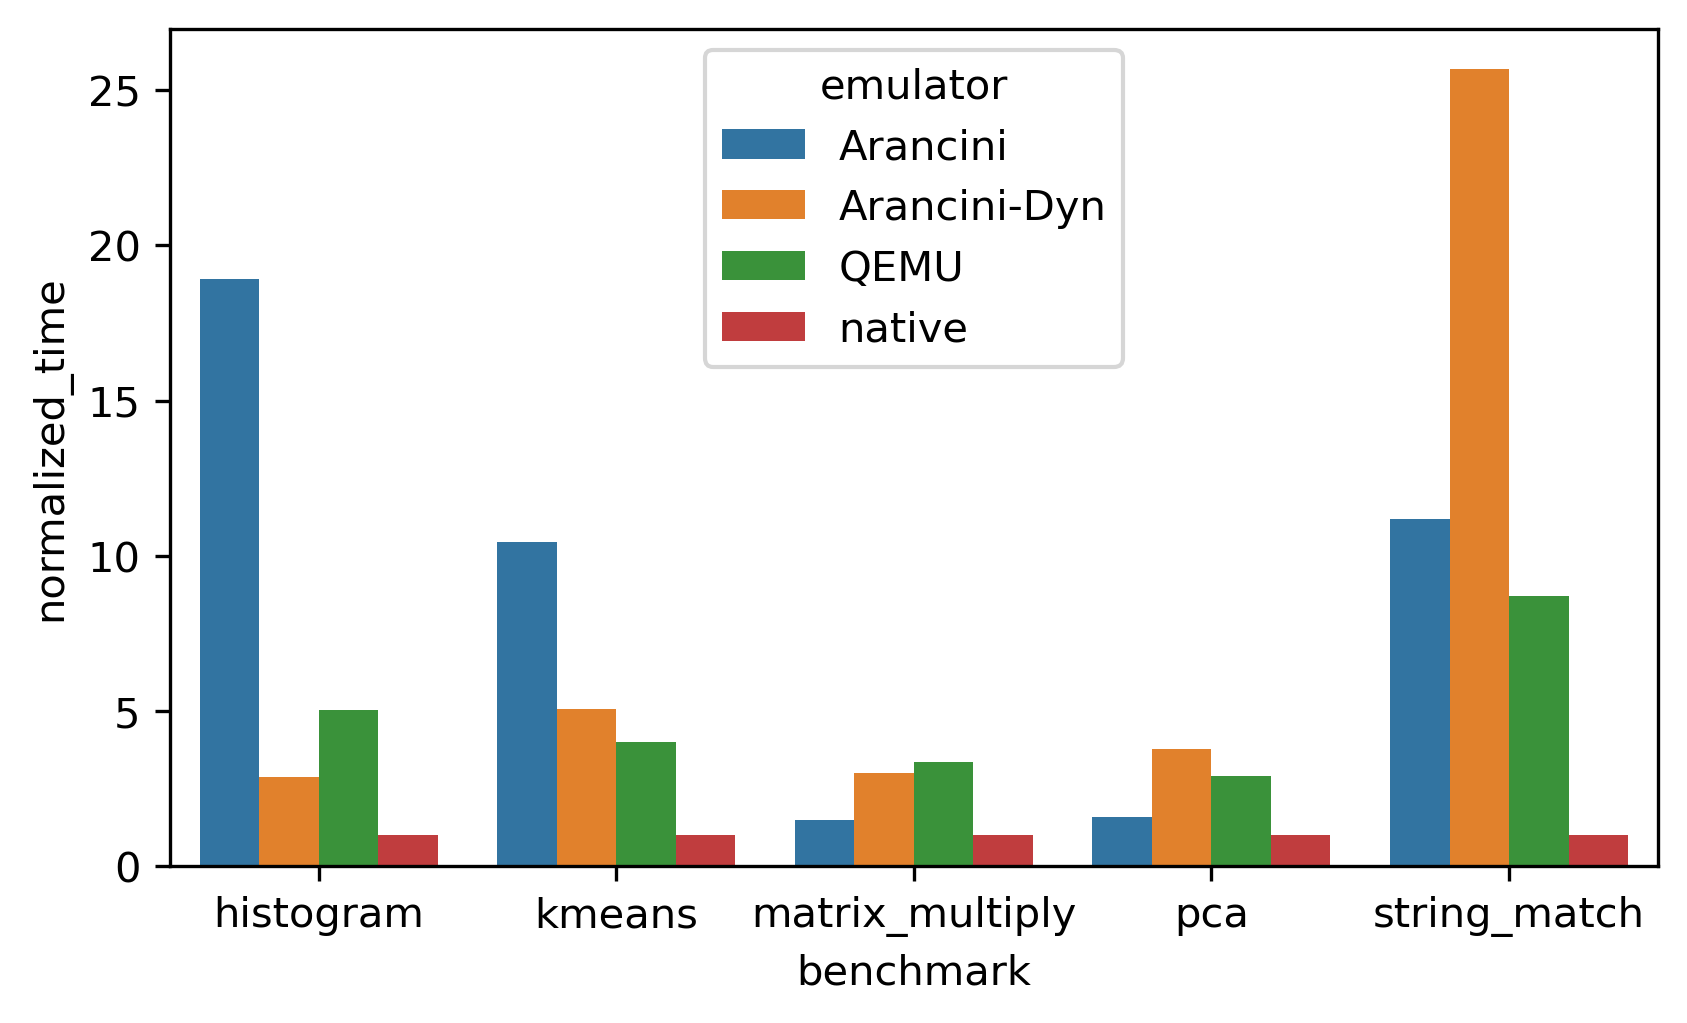

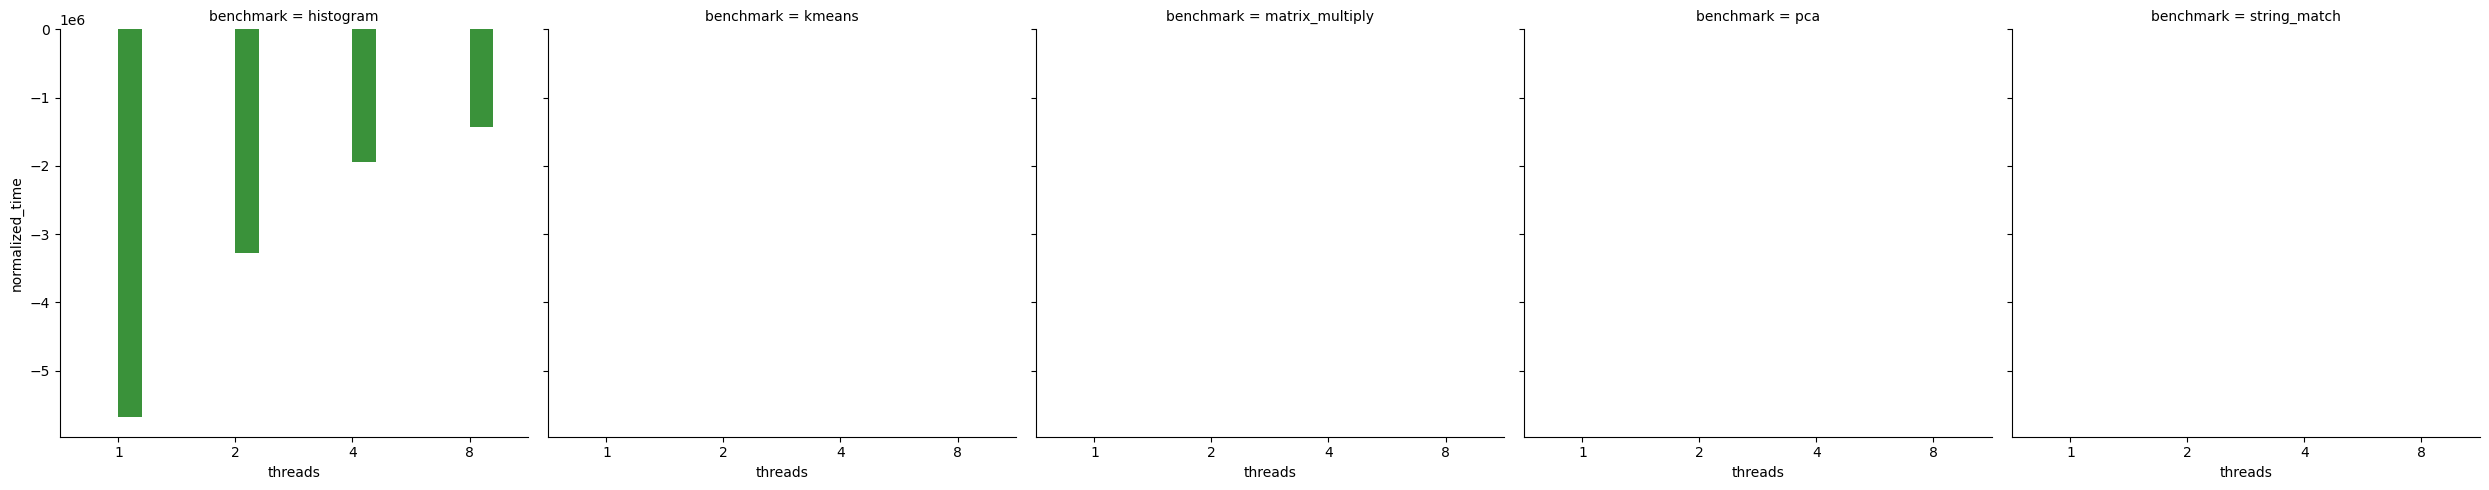

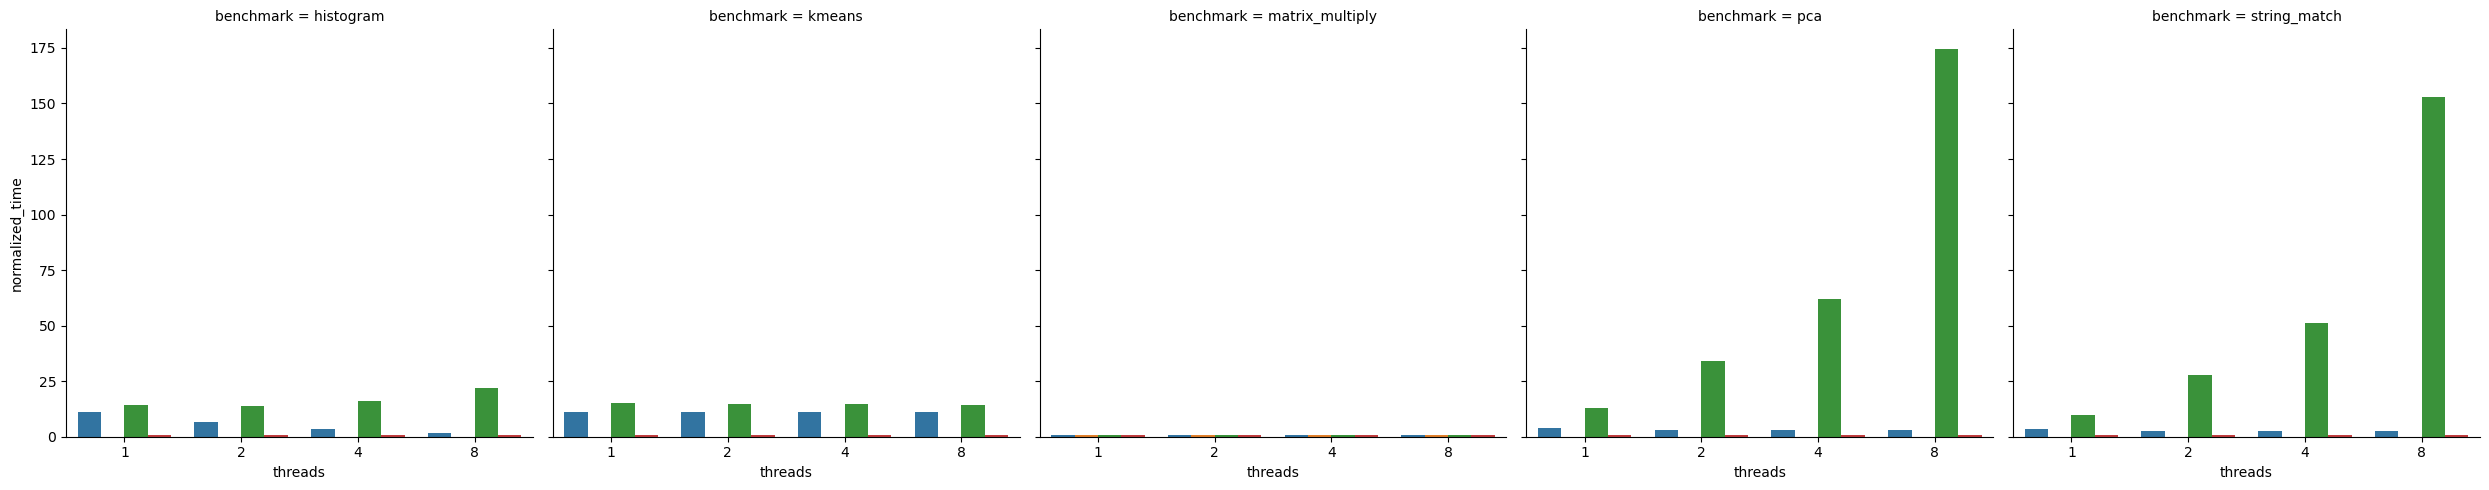

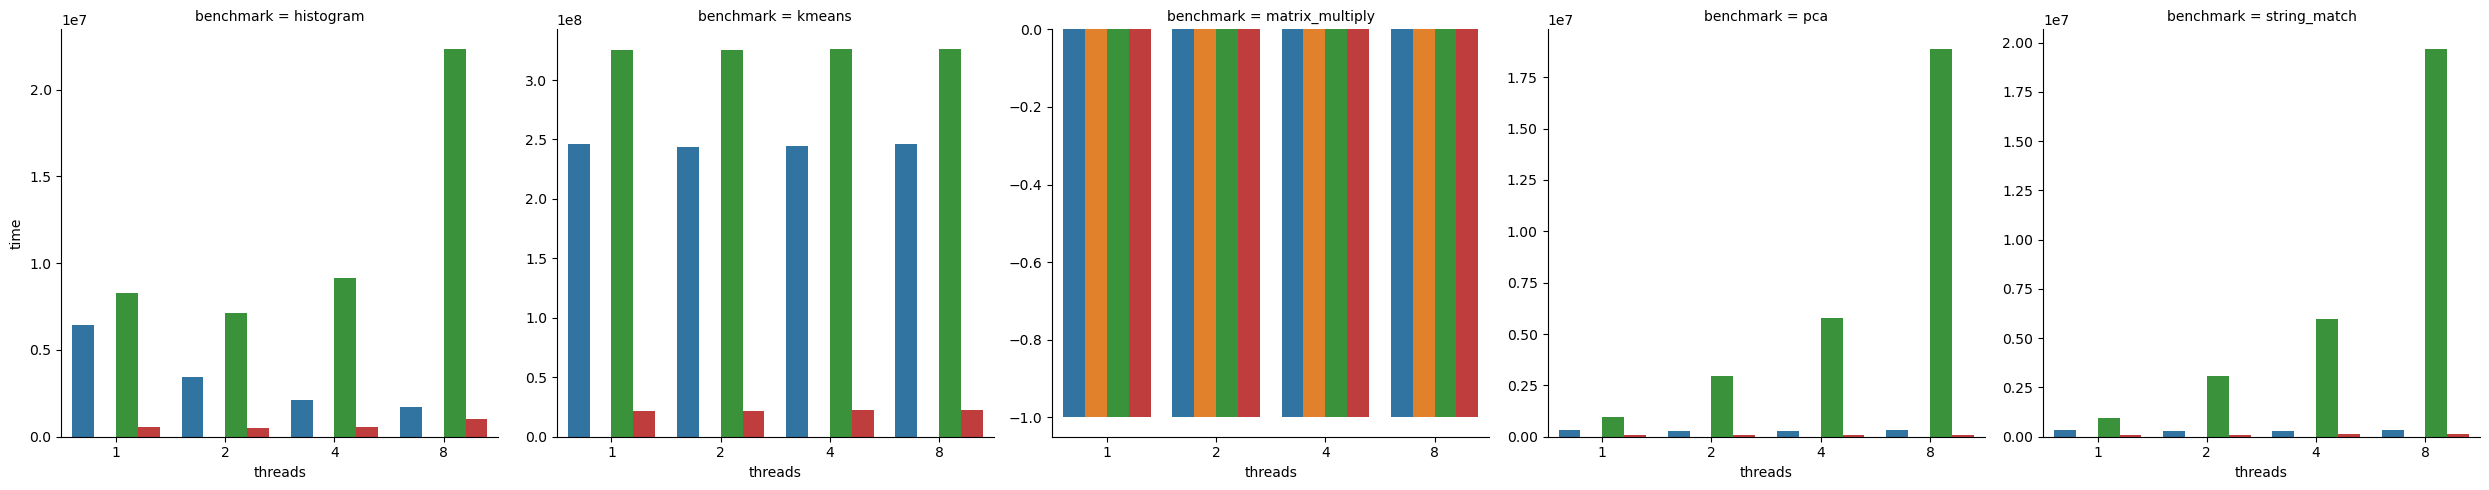

In [3]:
csvfile = open("../bench/latest/times.csv", "r")
df = pd.read_csv(csvfile)
df["linkname"] = "latest"

#csvfile = open("../bench/riscv-registers/times.csv", "r")
#bf = pd.read_csv(csvfile)
#bf["linkname"] = "riscv-registers"

def median_no_fails(s):
    if (s[s["time"]!= -1.0].empty):
        return s.groupby(["benchmark", "emulator", "type", "threads", "linkname"], as_index=False).median()

    s.drop(s[s["time"]== -1.0].index, inplace=True)
    tmp = s.groupby(["benchmark", "emulator", "type", "threads", "linkname"], as_index=False).median()
    return tmp

def normalize(s):
    tmp = s
    base = s[s["emulator"]=="native"]
    tmp["normalized_time"] = tmp["time"].map(lambda l: l/base["time"].iloc[0])
    return tmp
    
    
df = df.groupby(["emulator", "benchmark", "threads", "type"], as_index=False).apply(median_no_fails)
df = df.groupby(["benchmark", "threads", "type"], as_index=False).apply(normalize)


#bf.groupby(by=["emulator", "benchmark"]).median(numeric_only=True)
#bf["normalized time"] = bf["time"]
#bases = {}
#for b in bf["benchmark"].unique():
#    bases[b] = bf.loc[bf["benchmark"] == b,"time"].tolist()[0]

#bf["normalized time"] = bf[["normalized time", "benchmark"]].apply(lambda s: s["normalized time"]/bases[s["benchmark"]], axis=1)

seq = df[df["type"] == "sequential"]
ax = sns.barplot(data=seq, x="benchmark", y="normalized_time", hue="emulator")
#sns.barplot(data=bf, x="benchmark", y="normalized time", hue="emulator", ax=ax, palette="pastel", fill=False)
hatches = ['/', 'x', '\\', '-']

pthread = df[(df["type"]=="pthreads")]
sns.catplot(data=pthread, x="threads", y="normalized_time", hue="emulator", legend=None, col="benchmark", kind="bar")

mr = df[(df["type"]=="map-reduce")]
sns.catplot(data=mr, x="threads", y="normalized_time", hue="emulator", legend=None, col="benchmark", kind="bar")

sns.catplot(data=mr, x="threads", y="time", hue="emulator", legend=None, col="benchmark", kind="bar", sharey=False)

#for i,bar in enumerate(ax.patches):
#    bar.set_hatch(hatches[int(i/4)])
#for i,bar in enumerate(ax.get_legend().legend_handles):
#    bar.set_hatch(hatches[int(i)])
ax.figure.set_dpi(300)
ax.set_box_aspect(9/16)